In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn
import pandas as pd
import pickle
%matplotlib inline

In [10]:
iv = pd.read_csv('inventoryProcessed.csv', index_col='instance')
inventoryProcessed = iv

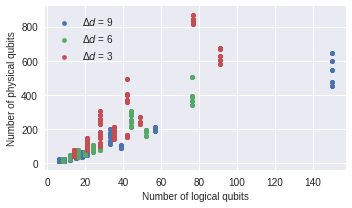

In [11]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)
size = 20
#subset = iv[(iv.isValid==True) & (iv.delayStep==9)]
subset = iv[(iv.NPhysQubits != 0) & (iv.delayStep==9)]
ax.scatter(subset.NLogQubits, subset.NPhysQubits, s=size, label='$\Delta d$ = 9');
subset = iv[(iv.NPhysQubits != 0) & (iv.delayStep==6)]
ax.scatter(subset.NLogQubits, subset.NPhysQubits, s=size, label='$\Delta d$ = 6');
subset = iv[(iv.NPhysQubits != 0) & (iv.delayStep==3)]
ax.scatter(subset.NLogQubits, subset.NPhysQubits, s=size, label='$\Delta d$ = 3');
fs = 10
ax.set_xlabel('Number of logical qubits', fontsize=fs)
ax.set_ylabel('Number of physical qubits', fontsize=fs) 
ax.legend(fontsize=fs);
#plt.rcParams['xtick.labelsize'] = fs
#plt.rcParams['ytick.labelsize'] = fs
plt.tight_layout()
pdf = matplotlib.backends.backend_pdf.PdfPages('physicalVsLogicalNumberOfQubits.pdf');
pdf.savefig(figure=fig);
pdf.close();

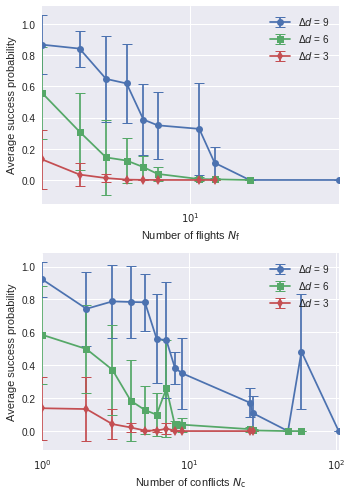

In [12]:
# vs. flights
subset = inventoryProcessed[inventoryProcessed['delayStep']==3].dropna()
d3 = subset.groupby('numFlights')['SuccessProbability'].mean()
d3errors = subset.groupby('numFlights')['SuccessProbability'].std().values
subset = inventoryProcessed[inventoryProcessed['delayStep']==6].dropna()
d6 = subset.groupby('numFlights')['SuccessProbability'].mean()
d6errors = subset.groupby('numFlights')['SuccessProbability'].std().values
subset = inventoryProcessed[inventoryProcessed['delayStep']==9].dropna()
d9 = subset.groupby('numFlights')['SuccessProbability'].mean()
d9errors = subset.groupby('numFlights')['SuccessProbability'].std().values

fig = plt.figure(figsize=(5, 7))
ax1 = fig.add_subplot(2,1,1)
d9.plot(marker = 'o', capsize=5, capthick=1, yerr=d9errors,  label='$\Delta d$ = 9', ax=ax1)
d6.plot(marker = 's', capsize=5, capthick=1, yerr=d6errors, label='$\Delta d$ = 6', ax=ax1)
d3.plot(marker = 'd', capsize=5, capthick=1, yerr=d3errors, label='$\Delta d$ = 3', ax=ax1)
ax1.set_xscale('log')
#ax1.set_xlim(2, inventoryProcessed.numFlights.max())
ax1.set_ylabel('Average success probability');
ax1.set_xlabel('Number of flights $N_\mathrm{f}$');
ax1.legend(loc='best');

# vs. conflicts
subset = inventoryProcessed[inventoryProcessed['delayStep']==3].dropna()
d3 = subset.groupby('numConflicts')['SuccessProbability'].mean()
d3errors = subset.groupby('numConflicts')['SuccessProbability'].std().values
subset = inventoryProcessed[inventoryProcessed['delayStep']==6].dropna()
d6 = subset.groupby('numConflicts')['SuccessProbability'].mean()
d6errors = subset.groupby('numConflicts')['SuccessProbability'].std().values
subset = inventoryProcessed[inventoryProcessed['delayStep']==9].dropna()
d9 = subset.groupby('numConflicts')['SuccessProbability'].mean()
d9errors = subset.groupby('numConflicts')['SuccessProbability'].std().values


ax2 = fig.add_subplot(2,1,2)
d9.plot(marker = 'o', capsize=5, capthick=1, yerr=d9errors, label='$\Delta d$ = 9', ax=ax2)
d6.plot(marker = 's', capsize=5, capthick=1, yerr=d6errors, label='$\Delta d$ = 6', ax=ax2)
d3.plot(marker = 'd', capsize=5, capthick=1, yerr=d3errors, label='$\Delta d$ = 3', ax=ax2)
ax2.set_xscale('log')
ax2.set_ylabel('Average success probability');
ax2.set_xlabel('Number of conflicts $N_\mathrm{c}$');
ax2.legend(loc='best');

# vs. flights, different penalty weights
d3_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d3_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d3_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()

plt.tight_layout()
pdf = matplotlib.backends.backend_pdf.PdfPages('annealing_results_success_vs_flights_and_conflicts.pdf');
pdf.savefig(figure=fig);
pdf.close();